In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [8]:
data=pd.read_csv('/home/user/Desktop/cars.csv')
train_df=pd.DataFrame(data)
train_df.describe()
train_df.shape
train_df.drop_duplicates().shape
train_df.dropna()
train_df.nunique()

Dimensions.Height                                   191
Dimensions.Length                                   205
Dimensions.Width                                    137
Engine Information.Driveline                          4
Engine Information.Engine Type                      509
Engine Information.Hybrid                             1
Engine Information.Number of Forward Gears            5
Engine Information.Transmission                      11
Fuel Information.City mpg                            27
Fuel Information.Fuel Type                            4
Fuel Information.Highway mpg                         33
Identification.Classification                         2
Identification.ID                                  4677
Identification.Make                                  47
Identification.Model Year                           851
Identification.Year                                   4
Engine Information.Engine Statistics.Horsepower     210
Engine Information.Engine Statistics.Torque     

In [9]:
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']


categorical_data=[feature for feature in train_df.columns if train_df[feature].dtype=='object']

In [10]:
print(train_df[numerical_data].corr())

                                                 Dimensions.Height  \
Dimensions.Height                                         1.000000   
Dimensions.Length                                         0.071112   
Dimensions.Width                                         -0.228049   
Engine Information.Number of Forward Gears                0.056441   
Fuel Information.City mpg                                 0.249107   
Fuel Information.Highway mpg                              0.243407   
Identification.Year                                       0.045468   
Engine Information.Engine Statistics.Horsepower          -0.152721   
Engine Information.Engine Statistics.Torque              -0.185981   

                                                 Dimensions.Length  \
Dimensions.Height                                         0.071112   
Dimensions.Length                                         1.000000   
Dimensions.Width                                          0.014783   
Engine Information.

In [11]:
train_df[numerical_data].skew()

Dimensions.Height                                 -0.348090
Dimensions.Length                                 -0.076527
Dimensions.Width                                  -0.298509
Engine Information.Number of Forward Gears        -0.155939
Fuel Information.City mpg                          0.512221
Fuel Information.Highway mpg                       6.130150
Identification.Year                                0.103491
Engine Information.Engine Statistics.Horsepower    0.688354
Engine Information.Engine Statistics.Torque        0.638991
dtype: float64

In [12]:
import ydata_profiling as pp
pp.ProfileReport(train_df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

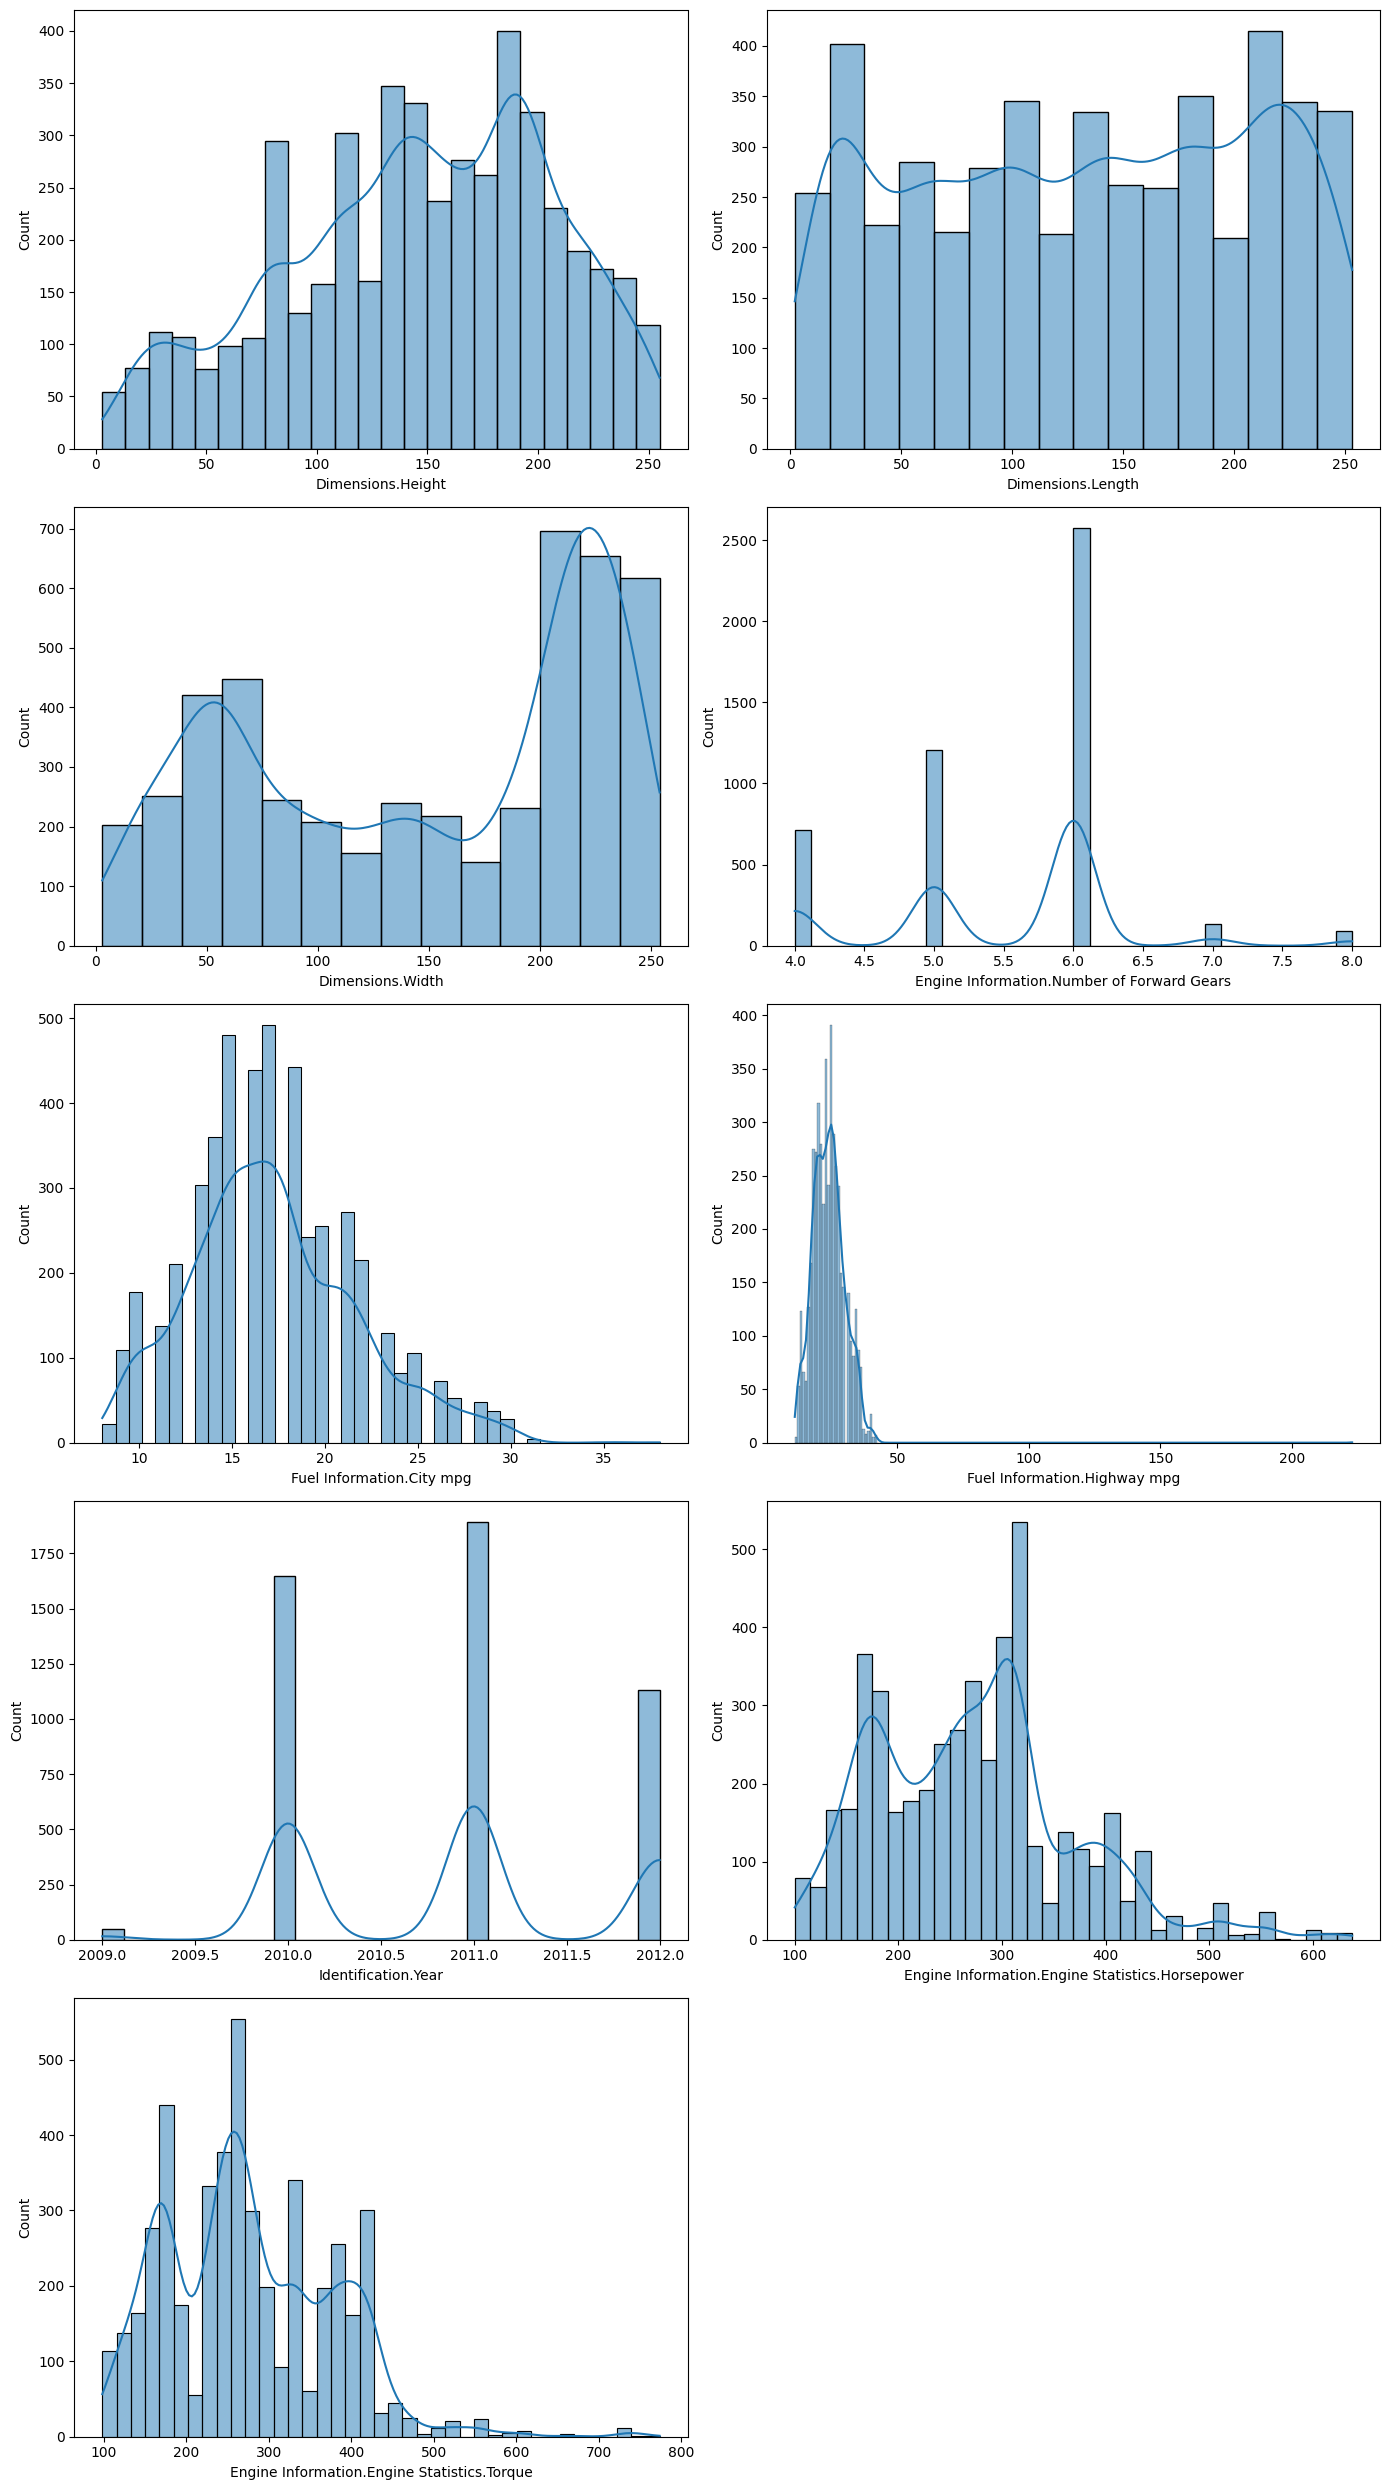

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns dynamically
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']

# Calculate number of rows and columns needed for the plots
n_cols = 2  # You can adjust this to any number of columns you prefer
n_rows = int(np.ceil(len(numerical_data) / n_cols))  # Calculate number of rows dynamically

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 5))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot histograms
for i, column in enumerate(numerical_data):
    ax = axes[i]
    sns.histplot(data=train_df, x=column, ax=ax, kde=True)
    
# Hide any empty subplots if there are fewer columns than subplots
for i in range(len(numerical_data), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

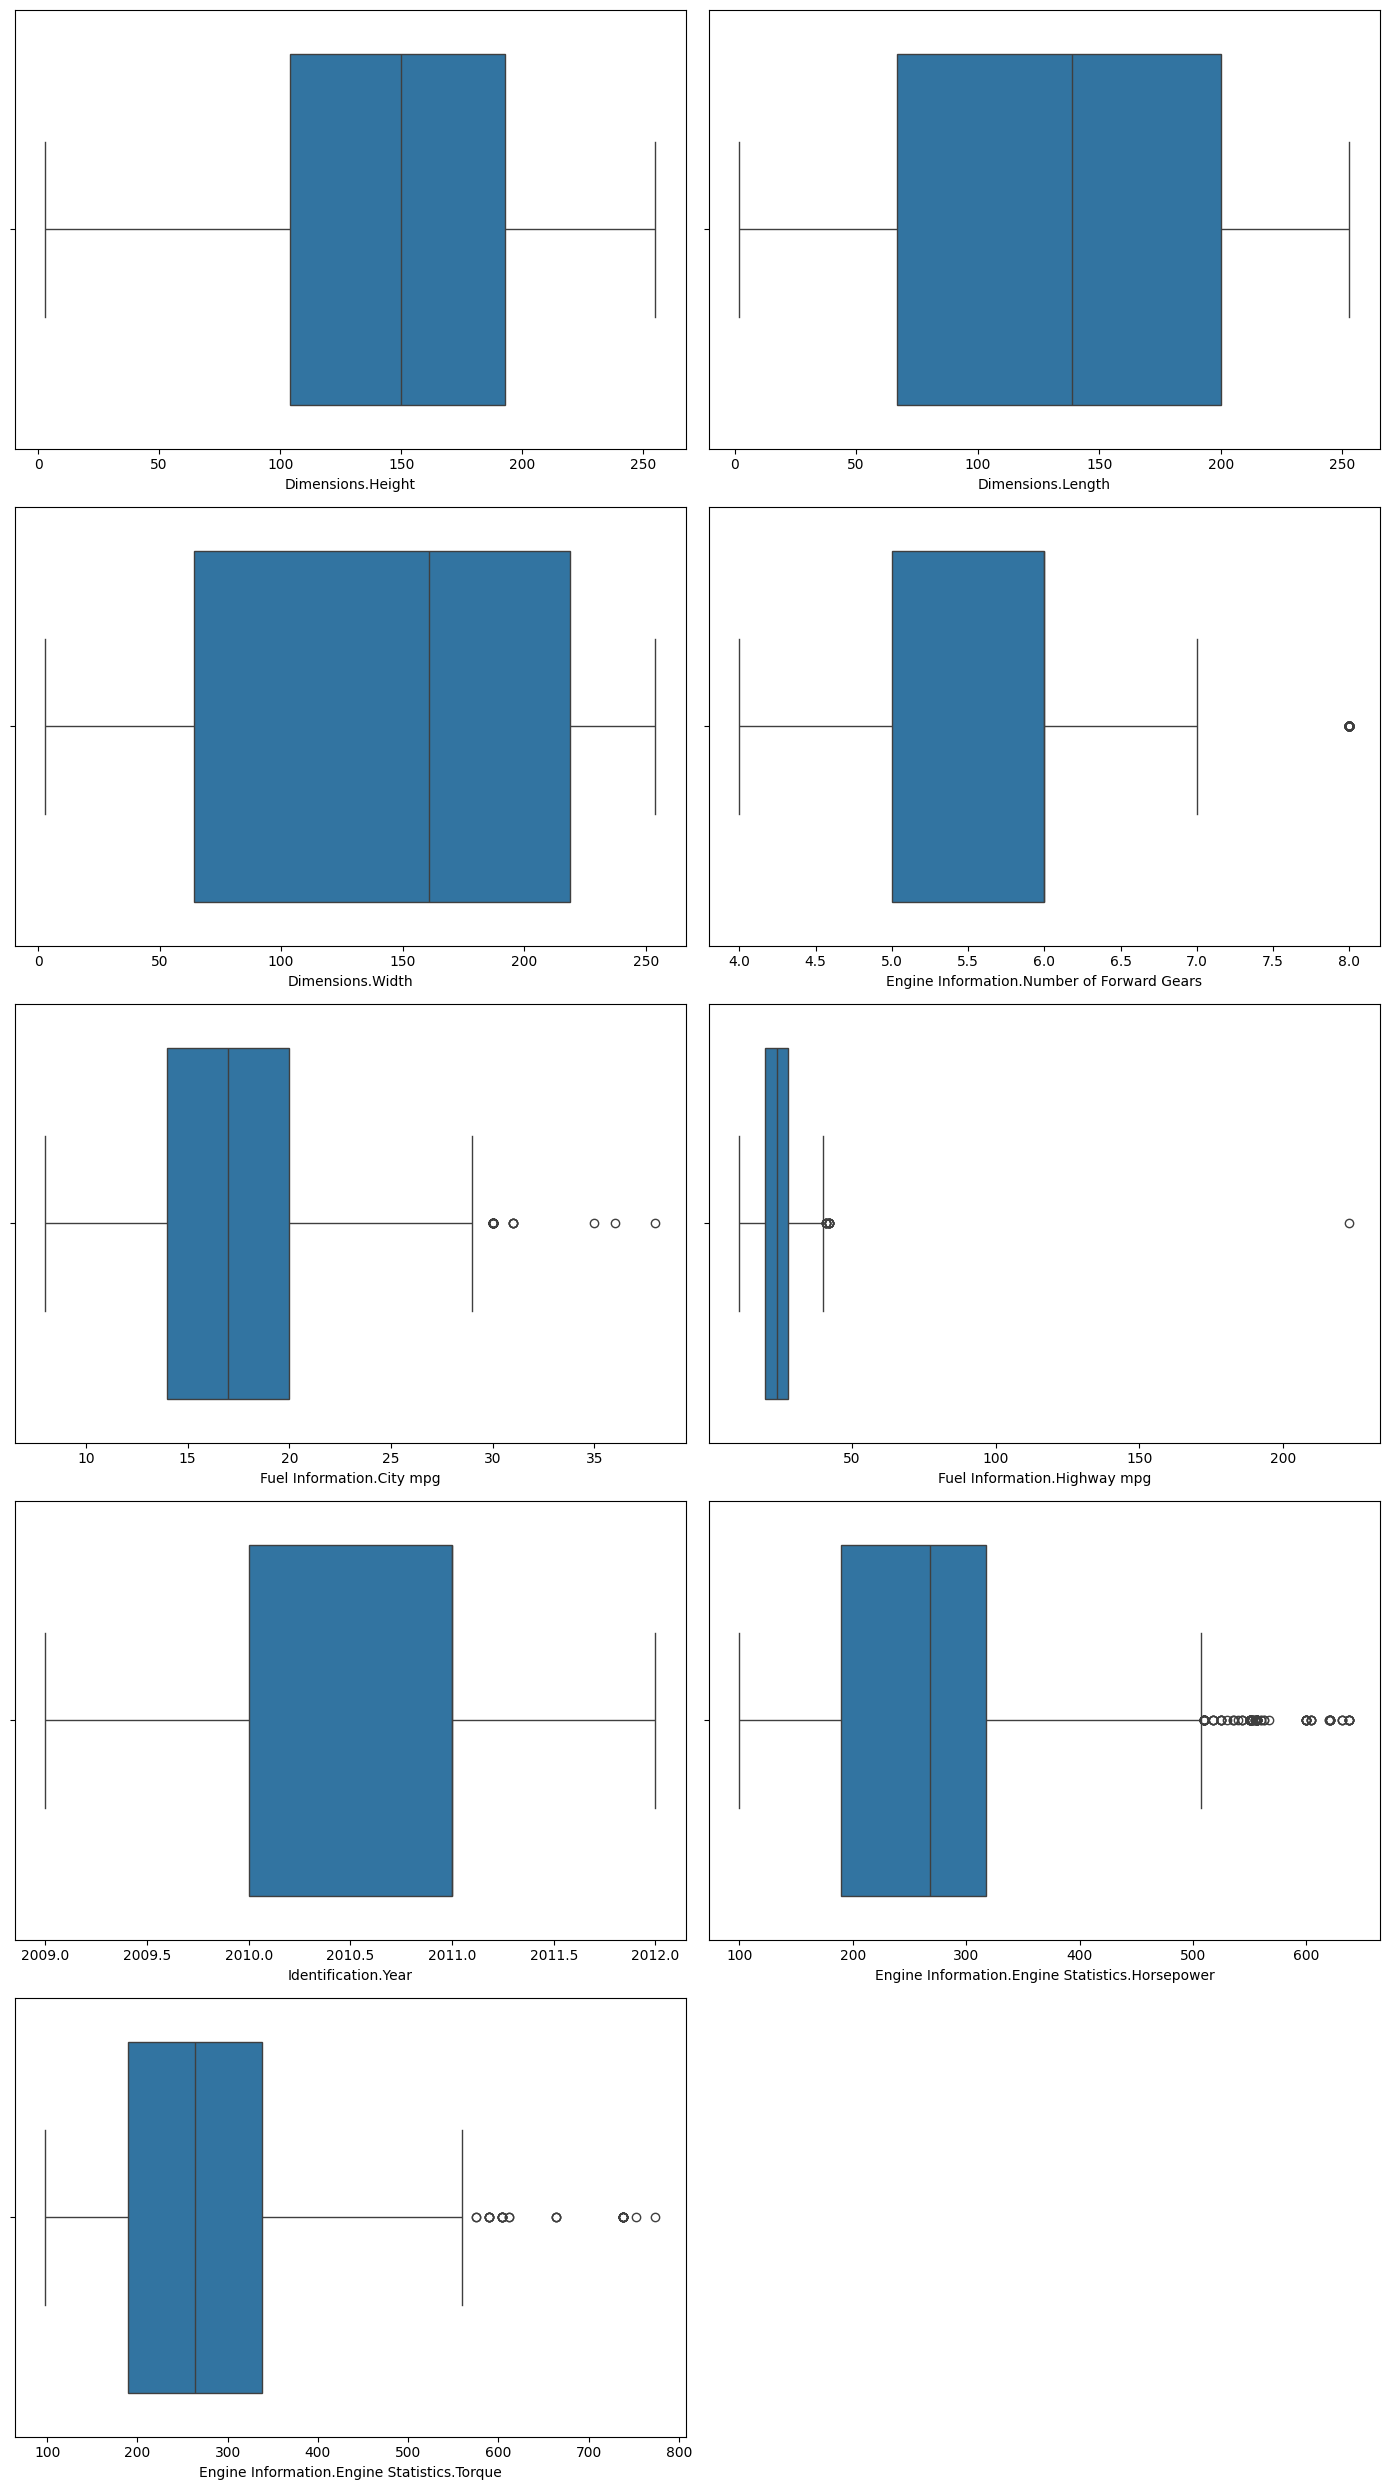

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns dynamically
numerical_data = [feature for feature in train_df.columns if train_df[feature].dtype != 'object']

# Calculate number of rows and columns needed for the plots
n_cols = 2  # You can adjust this to any number of columns you prefer
n_rows = int(np.ceil(len(numerical_data) / n_cols))  # Calculate number of rows dynamically

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 5))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Plot boxplots
for i, column in enumerate(numerical_data):
    ax = axes[i]
    sns.boxplot(data=train_df, x=column, ax=ax)
    
# Hide any empty subplots if there are fewer columns than subplots
for i in range(len(numerical_data), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


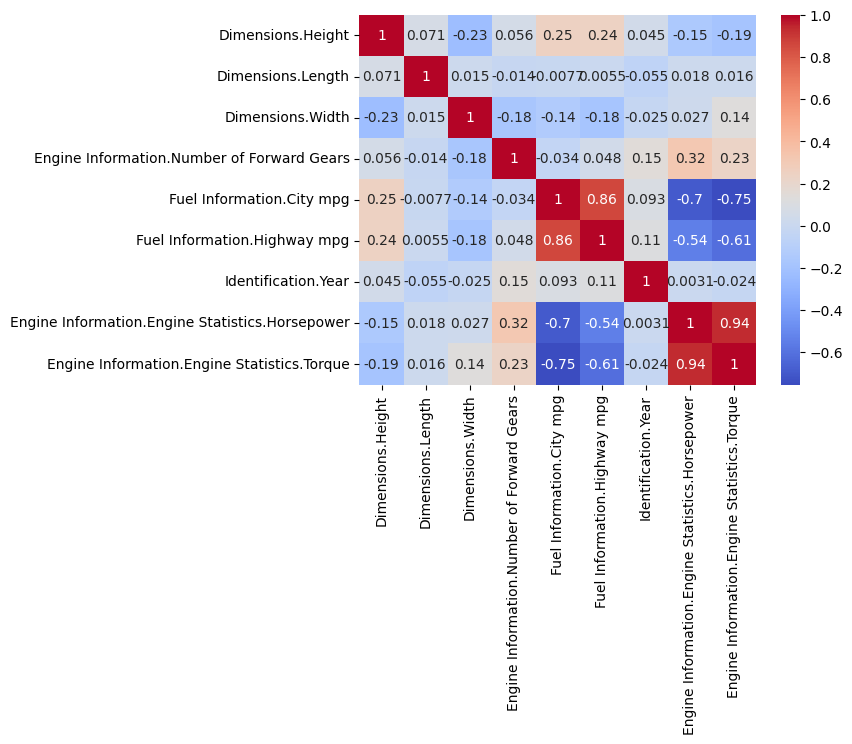

In [16]:
# Select only the numeric columns from the dataframe using the list of column names
numerical_df = train_df[numerical_data]

# Calculate and plot the correlation heatmap
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [17]:
def remove_outliers_IQR(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] > lower_bound) & (data[col] < upper_bound)]


In [18]:
for col in numerical_data:
    train_df = remove_outliers_IQR(train_df, col)

In [19]:
train_df.nunique()

Dimensions.Height                                   182
Dimensions.Length                                   197
Dimensions.Width                                    129
Engine Information.Driveline                          4
Engine Information.Engine Type                      434
Engine Information.Hybrid                             1
Engine Information.Number of Forward Gears            4
Engine Information.Transmission                      10
Fuel Information.City mpg                            21
Fuel Information.Fuel Type                            4
Fuel Information.Highway mpg                         28
Identification.Classification                         2
Identification.ID                                  4367
Identification.Make                                  42
Identification.Model Year                           750
Identification.Year                                   4
Engine Information.Engine Statistics.Horsepower     179
Engine Information.Engine Statistics.Torque     

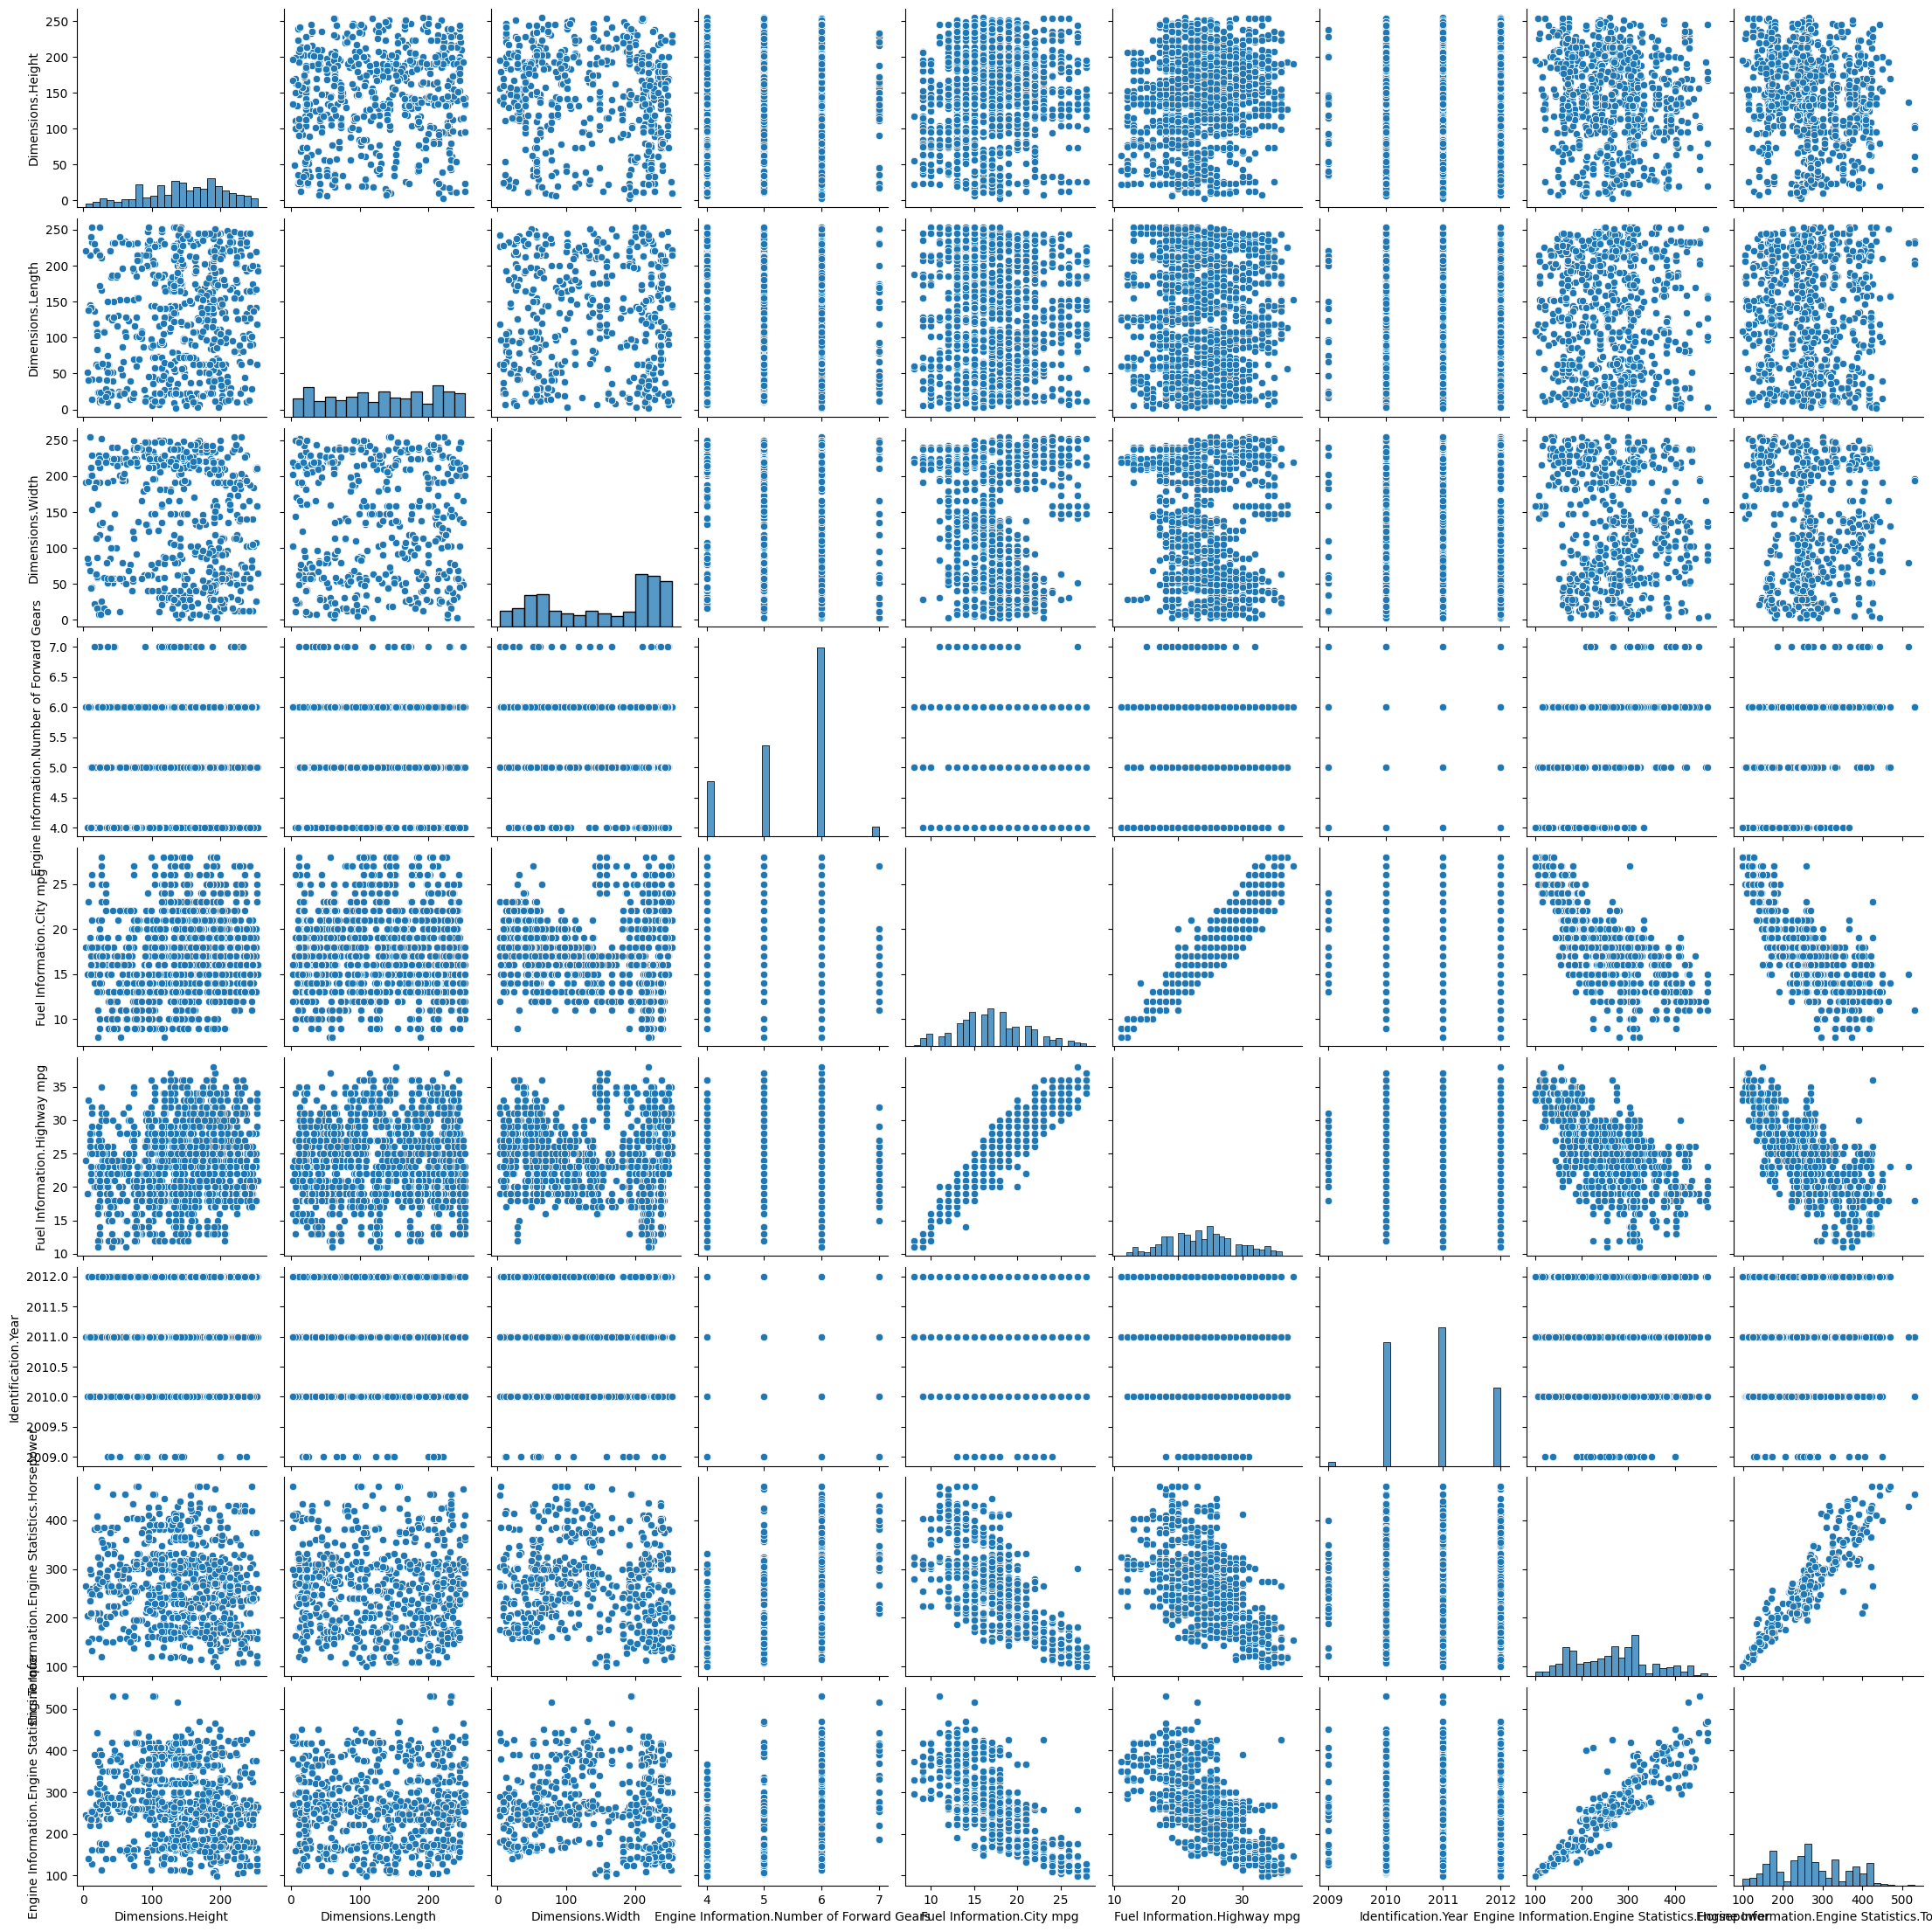

In [20]:
sns.pairplot(train_df[numerical_data])  # Use KDE for diagonal histograms

plt.show()
# Show the plot


In [21]:
scaler = StandardScaler()
train_df[numerical_data] = scaler.fit_transform(train_df[numerical_data])
print(train_df.head())

   Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0          -0.093697           0.145465          0.679991   
1          -0.093697           0.145465          0.679991   
2          -0.093697           0.145465          0.679991   
3          -0.093697           0.145465          0.679991   
4          -0.093697           0.145465          0.679991   

  Engine Information.Driveline                Engine Information.Engine Type  \
0              All-wheel drive          Audi 3.2L 6 cylinder 250hp 236ft-lbs   
1            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
2            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
3              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
4              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   

  Engine Information.Hybrid  Engine Information.Number of Forward Gears  \
0                      True                                     0.70084   
1 

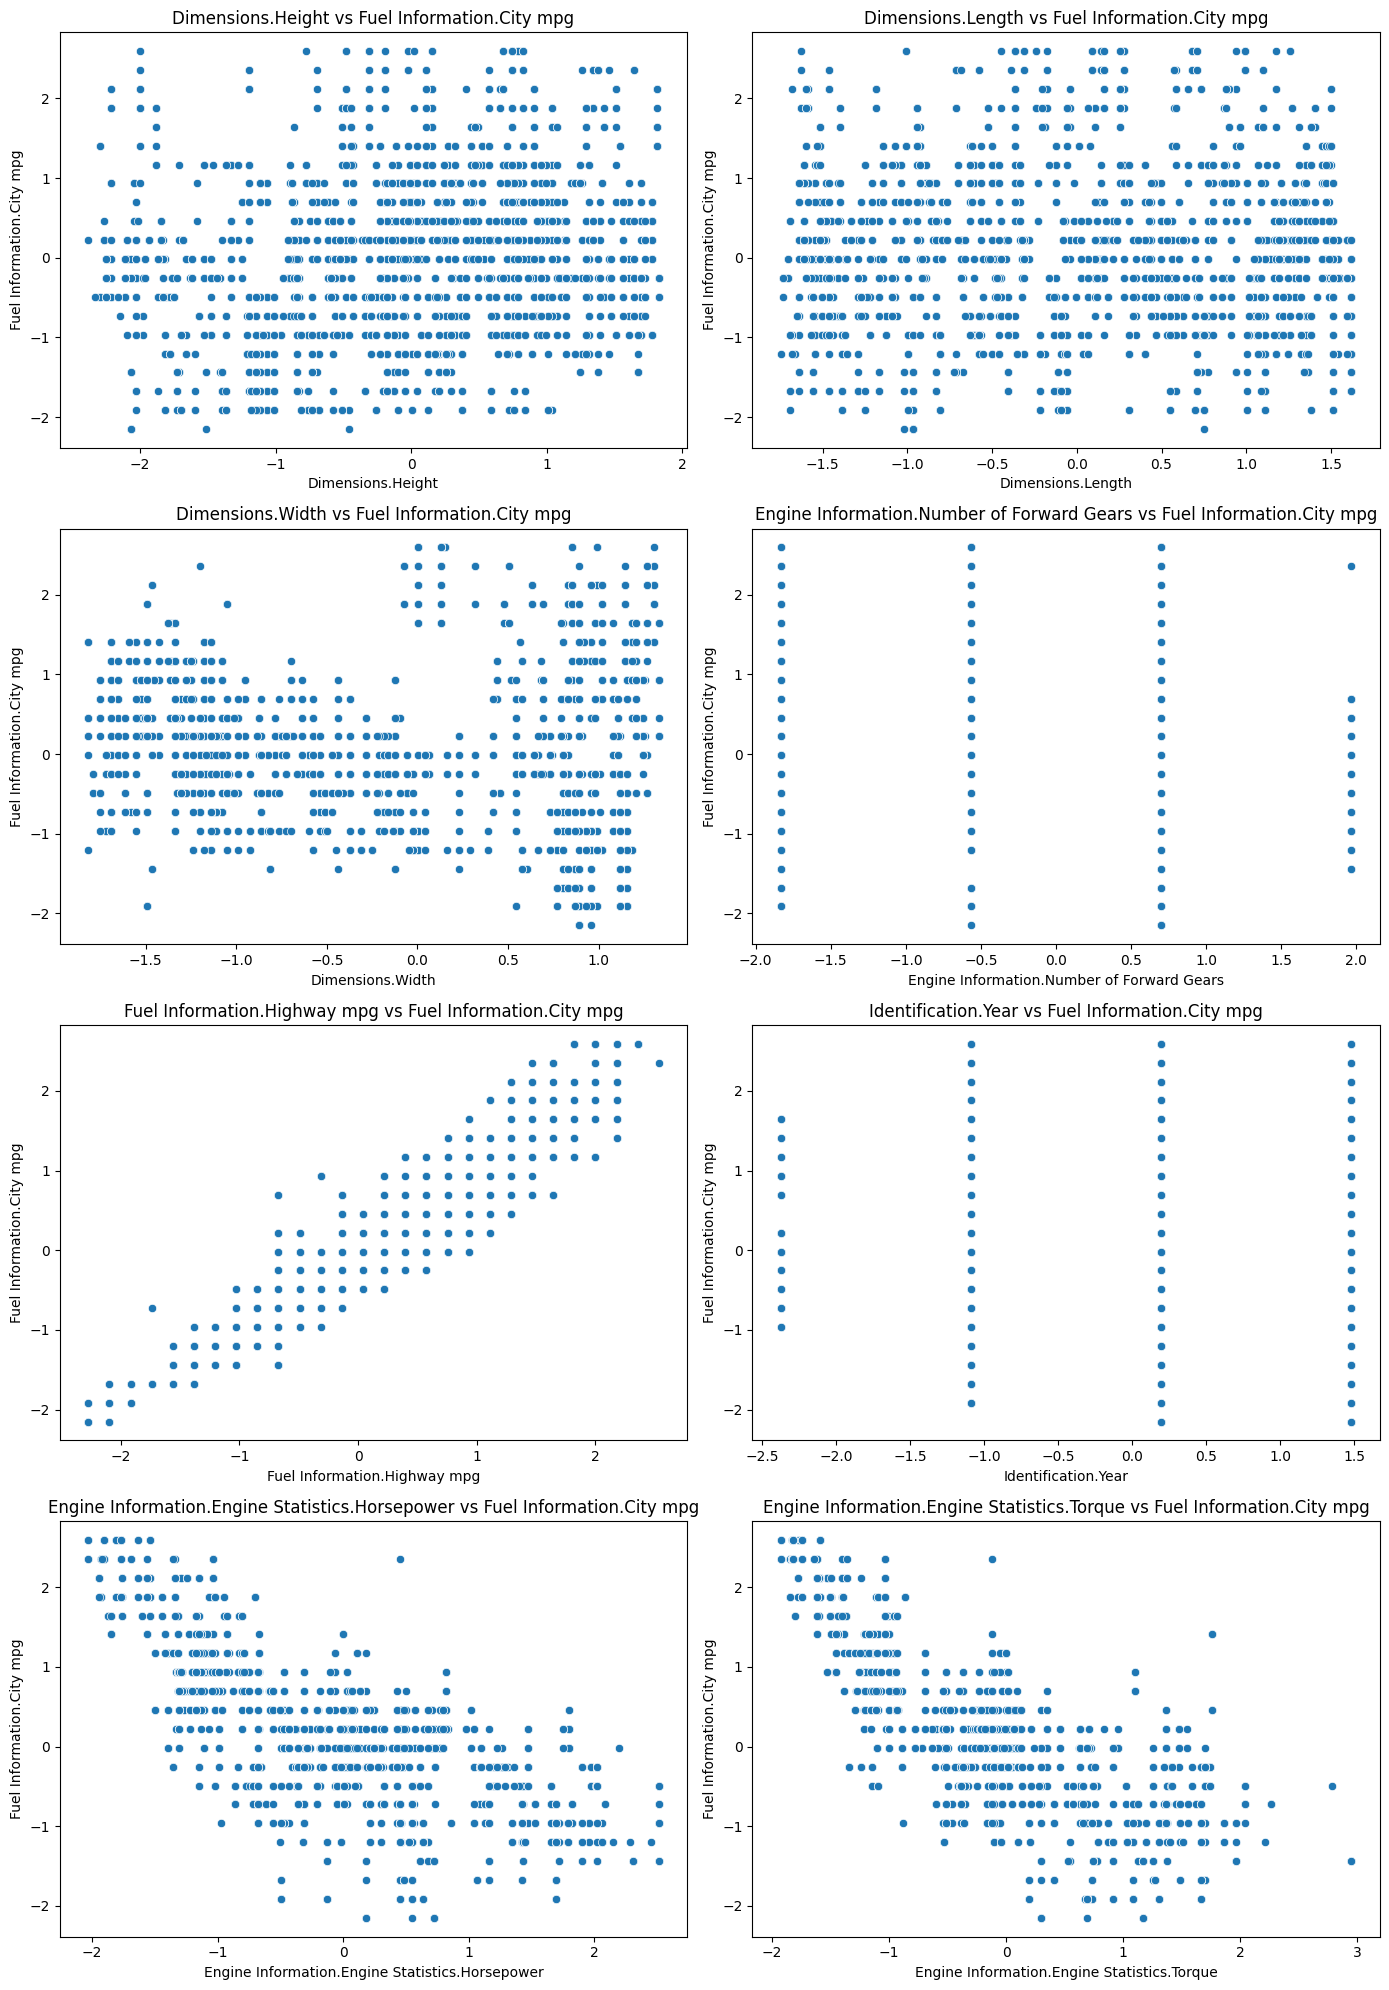

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dependent variable (target) and independent variables
target_variable = 'Fuel Information.City mpg'  # Change this to your target variable
independent_variables = [feature for feature in train_df.columns if feature != target_variable and train_df[feature].dtype != 'object']

# Create subplots dynamically
n_cols = 2  # Number of columns in the plot grid
n_rows = int(np.ceil(len(independent_variables) / n_cols))  # Calculate required rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 5))
axes = axes.flatten()  # Flatten to easily iterate over

# Plot scatter plots
for i, feature in enumerate(independent_variables):
    sns.scatterplot(data=train_df, x=feature, y=target_variable, ax=axes[i])
    axes[i].set_title(f"{feature} vs {target_variable}")

# Hide any extra subplots
for i in range(len(independent_variables), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [24]:
# Perform one-hot encoding for categorical variables
one_hot_variables = ['Engine Information.Driveline', 'Fuel Information.Fuel Type', 'Engine Information.Transmission']
df_encoded = pd.get_dummies(train_df, columns=one_hot_variables, drop_first=True)

# Get only the one-hot encoded binary columns
binary_columns = df_encoded.filter(regex='^Engine Information.Driveline|^Fuel Information.Fuel Type|^Engine Information.Transmission')

# Check the result
print("One-Hot Encoded Binary Columns:")
print(binary_columns.head())

One-Hot Encoded Binary Columns:
   Engine Information.Driveline_Four-wheel drive  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Engine Information.Driveline_Front-wheel drive  \
0                                           False   
1                                            True   
2                                            True   
3                                           False   
4                                           False   

   Engine Information.Driveline_Rear-wheel drive  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Fuel Information.Fue

In [22]:
target_variable=['Fuel Information.City mpg']
target_encoding_variables=['Identification.Make', 'Identification.Model Year']

In [28]:
target_encoding_variables = ['Identification.Make', 'Identification.Model Year']
target_variable = 'Fuel Information.City mpg'

# Ensure categorical columns are treated as strings
train_df[target_encoding_variables] = train_df[target_encoding_variables].astype(str)

encoded_variables = {}

# Perform target encoding
for col in target_encoding_variables:
    encoding_map = train_df.groupby(col)[target_variable].mean().to_dict()
    train_df[f'{col}_target_enc'] = train_df[col].map(encoding_map)
    encoded_variables[f'{col}_target_enc'] = train_df[f'{col}_target_enc']

# Convert to DataFrame
encoded_df = pd.DataFrame(encoded_variables)

# Check if the target-encoded columns are correctly added
print("Target Encoded DataFrame:")
print(encoded_df.head())


Target Encoded DataFrame:
   Identification.Make_target_enc  Identification.Model Year_target_enc
0                        0.100385                              0.837184
1                        0.100385                              0.837184
2                        0.100385                              0.837184
3                        0.100385                              0.837184
4                        0.100385                              0.837184


In [33]:
df_numer=['Engine Information.Engine Statistics.Horsepower', 'Identification.Year', 'Engine Information.Number of Forward Gears']

In [34]:
# Step 1: Select the numerical columns
df_numeric = train_df[df_numer]

# Step 2: Concatenate df_encoded (one-hot), encoded_df (target encoding), and df_numeric (numerical columns)
combined_df = pd.concat([binary_columns, encoded_df, df_numeric], axis=1)

# Display the final combined DataFrame
print("Final Combined DataFrame:")
print(combined_df.head())


Final Combined DataFrame:
   Engine Information.Driveline_Four-wheel drive  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Engine Information.Driveline_Front-wheel drive  \
0                                           False   
1                                            True   
2                                            True   
3                                           False   
4                                           False   

   Engine Information.Driveline_Rear-wheel drive  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   Fuel Information.Fuel Type

In [37]:
from sklearn.linear_model import LinearRegression

# Ensure you're working with the original dataset (e.g., df)
target_variable = 'Fuel Information.City mpg'

# Step 1: Separate target variable (y) and features (X)
X = combined_df  # Features (independent variables) from the original dataset
y = train_df[target_variable]  # Target variable from the original dataset

# Handle missing values
X = X.dropna()  # Drop rows with NaN in features
y = y[X.index]  # Ensure target variable matches the feature rows

# Step 2: Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Get the R-squared value (coefficient of determination)
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

# Step 4: Display coefficients and intercept
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

# Step 5: (Optional) Make predictions and evaluate the model
y_pred = model.predict(X)

# Print first 5 predictions as an example
print(f'Predictions: {y_pred[:5]}')


R-squared: 0.9403186847574428
Coefficients: [-0.0113303   0.17969644  0.14661987  0.44406173 -0.6856248   0.12774968
  0.08291302 -0.08504808 -0.0503214   0.12224302  0.04774052  0.01731505
 -0.01661762  0.04478206 -0.06568367 -0.01941753  0.75635039 -0.16815394
  0.01113498  0.02665196]
Intercept: -0.15543144871561862
Predictions: [0.64485016 0.92780388 0.89387122 0.74810744 0.74810744]
